### Librerias

In [83]:
import pandas as pd  
import os
import numpy as np
import datetime as dt # para gestión de fechas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from datetime import datetime
import locale
from scipy import stats
import re
import os

In [84]:
os.getcwd()

'd:\\Desktop\\Reto06\\scripts'

### Importar módulos creados por nosotros

In [85]:
import funciones as fn #funciones es el nombre del script dnd hemos creado las funciones

### Carga de datos

In [86]:
path_dataset = '..\\datosOriginales\\' # ruta donde se encuentran los datos
path_dataset1 = '..\\datosTransformados\\' # ruta donde se van a guardar los datos limpios
file = 'EDERJAKIN_LA_Datos_2021.xlsm'
fichero = pd.ExcelFile(path_dataset + file)
nombres_hojas = fichero.sheet_names

In [87]:
# leer todas las hojas
todo  = pd.read_excel(os.path.join(path_dataset,file), sheet_name = nombres_hojas)

# separar
for i in todo.keys():
    globals()['%s' % i.replace(" ", "_").lower()] = todo[i]

# Limpieza 

## DATA CLEANING

### ELIMINACION DE VARIABLES Y FILAS QUE NO DAN INFORMACION

In [88]:
#Usuarios
fn.eliminar_columnas(usuarios, 'last_access') #mas tarde imputaremos esta columna junto al primer acceso que estan en df accesos_1ero_ultimo

In [89]:
#Conocimientos
fn.eliminar_columnas(conocimientos, ['color', 'description', 'referencia']) #quitamos color y description ya que no aportan info y tienen pocos valores 


In [90]:
#Cursos
fn.eliminar_columnas(cursos, ['summary', 'sortorder']) #quitamos summary ya que con la informacion de course_name es suficiente, y sortorder porque no aporta info necesaria

In [91]:
#Itinerarios
fn.eliminar_columnas(itinearios, ['remarks']) #esta vacia y no aporta informacion

In [92]:
#Accesos
accesos.groupby('description').size() #quitamos los accesos que fueron ERROR, ya que no son errores validos
erroneas = accesos[accesos['description'] == 'Login SRM ERROR 1']
indice_erroneas = list(erroneas.index)
accesos = accesos.drop(indice_erroneas, axis = 0)


### CORRECCION DEL TIPO DE LAS VARIABLES

In [93]:
#usuarios:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           420 non-null    int64  
 1   useranonimo_name  420 non-null    object 
 2   active_flag       420 non-null    int64  
 3   language          420 non-null    object 
 4   mdl_user_id       405 non-null    float64
 5   role_admin        420 non-null    int64  
 6   role_manager      420 non-null    int64  
 7   role_student      420 non-null    int64  
 8   role_tutor        420 non-null    int64  
 9   planta_name       420 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 32.9+ KB


In [94]:
fn.corregir_tipo(df = usuarios, columnas = ['user_id','language', 'planta_name','mdl_user_id'], tipo = 'category') #las pasamos a tipo category
fn.corregir_tipo(df = usuarios, columnas = ['active_flag',  'role_admin','role_manager','role_student','role_tutor'], tipo = 'bool') #a tipo bool
fn.corregir_tipo(df = usuarios, columnas = ['useranonimo_name'], tipo = 'string')

#quitamos columnas Unnamed:
fn.eliminar_unnamed(usuarios)
usuarios.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   user_id           420 non-null    category
 1   useranonimo_name  420 non-null    string  
 2   active_flag       420 non-null    bool    
 3   language          420 non-null    category
 4   mdl_user_id       405 non-null    category
 5   role_admin        420 non-null    bool    
 6   role_manager      420 non-null    bool    
 7   role_student      420 non-null    bool    
 8   role_tutor        420 non-null    bool    
 9   planta_name       420 non-null    category
dtypes: bool(5), category(4), string(1)
memory usage: 54.8 KB


In [95]:
#tutores_perfil
tutores_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   perfil_id    188 non-null    int64 
 1   user_id      188 non-null    int64 
 2   perfil_name  118 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [96]:
fn.corregir_tipo(df= tutores_perfil, columnas= ['user_id','perfil_id'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= tutores_perfil, columnas= ['perfil_name'], tipo= 'string')
fn.eliminar_unnamed(tutores_perfil) #eliminamos columnas unnamed
tutores_perfil.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   perfil_id    188 non-null    category
 1   user_id      188 non-null    category
 2   perfil_name  118 non-null    string  
dtypes: category(2), string(1)
memory usage: 8.5 KB


In [97]:
#Conocimientos
conocimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   conocimiento_id              155 non-null    int64 
 1   conocimiento_name            155 non-null    object
 2   created_by                   155 non-null    int64 
 3   categoria_conocimiento_id    155 non-null    int64 
 4   categoria_conocimiento_name  133 non-null    object
dtypes: int64(3), object(2)
memory usage: 6.2+ KB


In [98]:
fn.corregir_tipo(df= conocimientos, columnas= [ 'conocimiento_id','categoria_conocimiento_id','created_by'], tipo= 'category') #las pasamos a category
fn.corregir_tipo(df= conocimientos, columnas= [ 'conocimiento_name','categoria_conocimiento_name'], tipo= 'string')
fn.eliminar_unnamed(conocimientos) #quitamos columnas 'unnamed'

conocimientos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   conocimiento_id              155 non-null    category
 1   conocimiento_name            155 non-null    string  
 2   created_by                   155 non-null    category
 3   categoria_conocimiento_id    155 non-null    category
 4   categoria_conocimiento_name  133 non-null    string  
dtypes: category(3), string(2)
memory usage: 10.9 KB


In [99]:
#Cursos
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   course_id         139 non-null    int64 
 1   course_name       139 non-null    object
 2   category          139 non-null    int64 
 3   hours             139 non-null    int64 
 4   course_shortname  139 non-null    object
dtypes: int64(3), object(2)
memory usage: 5.6+ KB


In [100]:
fn.corregir_tipo(df= cursos, columnas= ['category', 'course_id'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= cursos, columnas= ['course_name', 'course_shortname'], tipo= 'string') #a string
fn.eliminar_unnamed(cursos) #eliminamos columnas unnamed
cursos.rename(columns={'category':'course_category_id'}, inplace = True) #le ponemos un nombre mas apropiado
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   course_id           139 non-null    category
 1   course_name         139 non-null    string  
 2   course_category_id  139 non-null    category
 3   hours               139 non-null    int64   
 4   course_shortname    139 non-null    string  
dtypes: category(2), int64(1), string(2)
memory usage: 10.6 KB


In [101]:
#Programas
programas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   program_id           110 non-null    int64 
 1   program_name         110 non-null    object
 2   program_category_id  109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [102]:
fn.corregir_tipo(df= programas, columnas= ['program_id', 'program_category_id' ], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= programas, columnas= ['program_name'], tipo= 'string')
fn.eliminar_unnamed(programas) #eliminamos columnas unnamed
programas.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   program_id           110 non-null    category
 1   program_name         110 non-null    string  
 2   program_category_id  109 non-null    category
dtypes: category(2), string(1)
memory usage: 7.4 KB


In [103]:
#Cursos en programas
cursos_en_programas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   program_course_online_id  253 non-null    int64 
 1   course_moodle_id          253 non-null    int64 
 2   conocimiento_id           253 non-null    int64 
 3   num_periodo               253 non-null    int64 
 4   program_id                253 non-null    int64 
 5   course_moodle_id.1        253 non-null    object
 6   conocimiento_name         253 non-null    object
 7   program_name              253 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.9+ KB


In [104]:
fn.corregir_tipo(df= cursos_en_programas, columnas= ['program_course_online_id','course_moodle_id','conocimiento_id', 'program_id', 'num_periodo' ], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= cursos_en_programas, columnas= ['conocimiento_name','program_name','course_moodle_id.1'], tipo= 'string')
fn.eliminar_unnamed(cursos_en_programas) #eliminamos columnas unnamed

#cambiamos el mobre de course_moodle_id.1 a course_moodle_name
cursos_en_programas.rename(columns={'course_moodle_id.1': 'course_moodle_name'}, inplace=True)
cursos_en_programas.info() #correcto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   program_course_online_id  253 non-null    category
 1   course_moodle_id          253 non-null    category
 2   conocimiento_id           253 non-null    category
 3   num_periodo               253 non-null    category
 4   program_id                253 non-null    category
 5   course_moodle_name        253 non-null    string  
 6   conocimiento_name         253 non-null    string  
 7   program_name              253 non-null    string  
dtypes: category(5), string(3)
memory usage: 28.9 KB


In [105]:
#Itinerarios
itinearios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   active_flag         467 non-null    int64 
 1   category_id         467 non-null    int64 
 2   date_enroll         466 non-null    object
 3   enroll_end          170 non-null    object
 4   program_id          467 non-null    int64 
 5   tutor_academico_id  467 non-null    int64 
 6   tutor_empresa_id    467 non-null    int64 
 7   user_id             467 non-null    int64 
 8   category_name       467 non-null    object
 9   program_name        467 non-null    object
dtypes: int64(6), object(4)
memory usage: 36.6+ KB


In [106]:
#En primer lugar, cambiar nombre a tabla.

itinerarios = itinearios
del itinearios #la eliminamos para que no intervenga

fn.corregir_tipo(df= itinerarios, columnas= ['active_flag'], tipo= 'bool') #las pasamos a tipo bool
fn.corregir_tipo(df= itinerarios, columnas= ['user_id','tutor_academico_id', 'tutor_empresa_id','category_id', 'program_id' ], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= itinerarios, columnas= ['category_name', 'program_name'], tipo= 'string') #las pasamos a tipo string

itinerarios['enroll_end'] = pd.to_datetime(itinerarios['enroll_end'], utc= True) #las pasamos a tipo date
itinerarios['date_enroll'] = pd.to_datetime(itinerarios['date_enroll'], utc= True)

fn.eliminar_unnamed(itinerarios) #eliminamos columnas unnamed
itinerarios.rename(columns={'category_id':'itinerary_category_id', 'category_name':'itinerary_category_name'}, inplace = True) #le ponemos un nombre mas apropiado
itinerarios.info() #correcto


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   active_flag              467 non-null    bool               
 1   itinerary_category_id    467 non-null    category           
 2   date_enroll              466 non-null    datetime64[ns, UTC]
 3   enroll_end               170 non-null    datetime64[ns, UTC]
 4   program_id               467 non-null    category           
 5   tutor_academico_id       467 non-null    category           
 6   tutor_empresa_id         467 non-null    category           
 7   user_id                  467 non-null    category           
 8   itinerary_category_name  467 non-null    string             
 9   program_name             467 non-null    string             
dtypes: bool(1), category(5), datetime64[ns, UTC](2), string(2)
memory usage: 34.8 KB


In [107]:
#Notas_cursos
notas_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   enroll_grade_id  3898 non-null   int64  
 1   active_flag      3898 non-null   int64  
 2   course_id        3898 non-null   int64  
 3   enroll_id        3898 non-null   int64  
 4   grade            1475 non-null   float64
 5   online_progress  1518 non-null   float64
 6   course_name      3898 non-null   object 
 7   user_id          3898 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 243.8+ KB


In [108]:
fn.corregir_tipo(df= notas_cursos, columnas= ['active_flag'], tipo= 'bool') #las pasamos a tipo bool
fn.corregir_tipo(df= notas_cursos, columnas= ['enroll_grade_id', 'course_id', 'enroll_id', 'user_id' ], tipo= 'category')
fn.corregir_tipo(df= notas_cursos, columnas= ['course_name'], tipo= 'string')

fn.eliminar_unnamed(notas_cursos) #eliminamos columnas unnamed
notas_cursos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   enroll_grade_id  3898 non-null   category
 1   active_flag      3898 non-null   bool    
 2   course_id        3898 non-null   category
 3   enroll_id        3898 non-null   category
 4   grade            1475 non-null   float64 
 5   online_progress  1518 non-null   float64 
 6   course_name      3898 non-null   string  
 7   user_id          3898 non-null   category
dtypes: bool(1), category(4), float64(2), string(1)
memory usage: 353.8 KB


In [109]:
#Roles
roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   role_id    4 non-null      int64 
 1   role_name  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [110]:
fn.corregir_tipo(df= roles, columnas= ['role_id'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= roles, columnas= ['role_name'], tipo= 'string')
fn.eliminar_unnamed(roles) #eliminamos columnas unnamed
roles.info() #correcto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   role_id    4 non-null      category
 1   role_name  4 non-null      string  
dtypes: category(1), string(1)
memory usage: 356.0 bytes


In [111]:
#Plantas
plantas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   planta_id    18 non-null     int64 
 1   planta_name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [112]:
fn.corregir_tipo(df= plantas, columnas= ['planta_id'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= plantas, columnas= ['planta_name'], tipo= 'string')
fn.eliminar_unnamed(plantas) #eliminamos columnas unnamed
plantas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   planta_id    18 non-null     category
 1   planta_name  18 non-null     string  
dtypes: category(1), string(1)
memory usage: 1.0 KB


In [113]:
#Accesos
accesos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8254 entries, 0 to 8815
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  8254 non-null   object
 1   timestamp    8254 non-null   object
 2   mdl_user_id  8254 non-null   int64 
 3   user_id      8254 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 322.4+ KB


In [114]:
fn.corregir_tipo(df= accesos, columnas= ['mdl_user_id', 'user_id'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= accesos, columnas= ['description'], tipo= 'string')
fn.eliminar_unnamed(accesos) #eliminamos columnas unnamed
accesos['timestamp'] = pd.to_datetime(accesos['timestamp'], utc= True)
accesos.info() #correcto

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8254 entries, 0 to 8815
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   description  8254 non-null   string             
 1   timestamp    8254 non-null   datetime64[ns, UTC]
 2   mdl_user_id  8254 non-null   category           
 3   user_id      8254 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), string(1)
memory usage: 238.7 KB


In [115]:
#Acceso_1ero_ultimo
acceso_1ero_ultimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mdl_user_id    372 non-null    int64 
 1   1er acceso     372 non-null    object
 2   ultimo acceso  372 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [116]:
#Acceso_1ero_ultimo
fn.eliminar_dias(df= acceso_1ero_ultimo , columna= '1er acceso') #convertimos las fechas de texto a numerico, primero eliminando el dia de la semana
fn.eliminar_dias(df= acceso_1ero_ultimo , columna= 'ultimo acceso')
locale.setlocale(locale.LC_ALL, 'esp_esp') #cambiamos el idioma
fn.fecha_texto(acceso_1ero_ultimo, '1er acceso')
fn.fecha_texto(acceso_1ero_ultimo, 'ultimo acceso')

fn.corregir_tipo(df= acceso_1ero_ultimo, columnas= ['mdl_user_id'], tipo= 'category') #las pasamos a tipo category
acceso_1ero_ultimo['1er acceso'] = pd.to_datetime(acceso_1ero_ultimo['1er acceso'], utc= True) #a tipo datetime
acceso_1ero_ultimo['ultimo acceso'] = pd.to_datetime(acceso_1ero_ultimo['1er acceso'], utc= True)
fn.eliminar_unnamed(accesos) #eliminamos columnas unnamed
acceso_1ero_ultimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   mdl_user_id    372 non-null    category           
 1   1er acceso     295 non-null    datetime64[ns, UTC]
 2   ultimo acceso  295 non-null    datetime64[ns, UTC]
dtypes: category(1), datetime64[ns, UTC](2)
memory usage: 19.6 KB


In [117]:
#Actividades
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mdl_user_id     3464 non-null   int64  
 1   course_name     3464 non-null   object 
 2   course_id       3464 non-null   int64  
 3   category        3464 non-null   object 
 4   actividad_name  3460 non-null   object 
 5   grade           2114 non-null   float64
 6   time            2129 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 189.6+ KB


In [118]:
fn.corregir_tipo(df= actividades, columnas= ['mdl_user_id', 'course_id', 'category'], tipo= 'category') #las pasamos a tipo category
fn.corregir_tipo(df= actividades, columnas= ['course_name', 'actividad_name'], tipo= 'string')
actividades['time'] = pd.to_datetime(actividades['time'], utc= True) #a tipo datetime

fn.eliminar_unnamed(actividades) #eliminamos columnas unnamed
actividades.rename(columns = {'category': 'course_category_id'}, inplace= True) #le ponemos el mismo nombre que en las otras tablas ya que es la misma variable
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   mdl_user_id         3464 non-null   category           
 1   course_name         3464 non-null   string             
 2   course_id           3464 non-null   category           
 3   course_category_id  3464 non-null   category           
 4   actividad_name      3460 non-null   string             
 5   grade               2114 non-null   float64            
 6   time                2129 non-null   datetime64[ns, UTC]
dtypes: category(3), datetime64[ns, UTC](1), float64(1), string(2)
memory usage: 131.9 KB


# Estadisticos

In [119]:
#Usuarios
usuarios.shape #dimensiones (420, 12)
usuarios.columns
usuarios.describe() #son todas variables discretas
usuarios['language'].value_counts().to_frame()
usuarios['planta_name'].value_counts().to_frame() 
usuarios.loc[usuarios['planta_name'] == 'MT Aretxabal', 'planta_name'] = 'MT Aretxabaleta' #renombramos MT Aretxabal a MT Aretxabaleta



In [120]:
#Tutores_perfil
tutores_perfil.shape #dimensiones (188, 3)
tutores_perfil.columns
tutores_perfil.describe() #son todas variables discretas
tutores_perfil['perfil_name'].value_counts().to_frame()

,perfil_name
Tutor empresa,67
Instructor,27
Gestor de empresa,22
Tutor académico,2


In [121]:
#Conocimientos
conocimientos.shape #dimensiones (155, 5)
conocimientos.columns
conocimientos.describe()
conocimientos['created_by'].value_counts().to_frame()
conocimientos['categoria_conocimiento_name'].value_counts().to_frame()


,categoria_conocimiento_name
TÉCNICOS/TECNOLÓGICOS ABP,24
GESTION,22
ACOGIDA,16
TÉCNICO / TECNOLÓGICO MT - REFERENCIAS,16
DUAL,15
TÉCNICOS,8
PERSONALES,8
Técnico Tecnologico ABP Referencias,5
TÉCNICO / TECNOLÓGICO MT,4
SOCIETARIOS,4


In [122]:
#Cursos
cursos.shape #dimensiones (139, 5)
cursos.columns
cursos.describe(include=['object', 'category'])
cursos['hours'].describe()
cursos['course_category_id'].value_counts().to_frame()

,course_category_id
3,32
27,20
24,20
7,17
45,14
44,11
5,9
35,8
42,3
23,2


In [123]:
#Programas
programas.shape #dimensiones (110, 3)
programas.columns
programas.describe()
programas['program_category_id'].value_counts().to_frame()

,program_category_id
TÉCNICO,57
DUAL,24
SOPORTE&OPERARIO,13
GESTIÓN,5
ESPECIALISTA,5
FORMACIÓN,4
PROFESIONAL,1


In [124]:
#Cursos en programas
cursos_en_programas.shape #dimensiones (253, 8)
cursos_en_programas.columns
cursos_en_programas.describe(include=['category', 'object'])
cursos_en_programas['course_moodle_name'].value_counts().to_frame()
cursos_en_programas['conocimiento_name'].value_counts().to_frame()
cursos_en_programas['num_periodo'].value_counts().to_frame()
cursos_en_programas['program_name'].value_counts().to_frame()



,program_name
Maquinista Mecanizados Autogestión MT,18
TÉCNICO DEMO 72535972K,15
Maquinista Mecanizado ABP Bergara,11
PERTSONALAK,9
prueba_na,8
Control Visual Mec ABP,7
prueba_na2,7
pruebas_01,6
Tratamiento Térmico ABP Arrasate,6
Tratamiento Térmico ABP Bergara,6


In [125]:
#Itinerarios
itinerarios.shape #dimensiones (467, 10)
itinerarios.columns
itinerarios.describe(include=['category', 'object', 'bool'])
itinerarios.describe(include=['datetime64[ns, UTC]'])

#hacemos una nueva variable para saber la duracion del programa
itinerarios['duracion'] = itinerarios['enroll_end'] - itinerarios['date_enroll']
itinerarios.describe(include=['timedelta64[ns]']) #tenemos duraciones por debajo de cero, quiere decir que el date_enroll de algunos programas ocurre despues que el enroll_end, es imposible
itinerarios[itinerarios['duracion'] < '0 days'] #intercambiamos los valores las dos columnas en esas dos filas

fecha = itinerarios.loc[96, 'date_enroll']
itinerarios.loc[96, 'date_enroll'] = itinerarios.loc[96, 'enroll_end']
itinerarios.loc[96, 'enroll_end'] = fecha

fecha = itinerarios.loc[317, 'date_enroll']
itinerarios.loc[317, 'date_enroll'] = itinerarios.loc[317, 'enroll_end']
itinerarios.loc[317, 'enroll_end'] = fecha

In [126]:
itinerarios['duracion'] = itinerarios['enroll_end'] - itinerarios['date_enroll'] #volvemos a calcular la variable duracion
itinerarios[itinerarios['duracion'] < '0 days'] #correcto

,active_flag,itinerary_category_id,date_enroll,enroll_end,program_id,tutor_academico_id,tutor_empresa_id,user_id,itinerary_category_name,program_name,duracion


In [127]:
#Notas_cursos
notas_cursos.shape #dimensiones (3898, 8)
notas_cursos.columns
notas_cursos.describe(include=['category', 'object', 'bool']) #variables discretas
notas_cursos['course_name'].value_counts().to_frame()

notas_cursos.describe(include= 'float64') #variables continuas


,grade,online_progress
count,1475.000000,1518.000000
mean,5.659431,33.972245
std,5.879756,45.715231
min,0.000000,0.000000
25%,0.000000,0.000000
50%,8.330000,0.000000
75%,10.000000,100.000000
max,100.000000,100.000000


In [128]:
#Roles
roles.shape #dimensiones (4, 2)
roles.columns
roles['role_name'].describe() 


count             4
unique            4
top       LBL_ADMIN
freq              1
Name: role_name, dtype: object

In [129]:
#Plantas
plantas.shape #dimensiones (18, 2)
plantas.columns
plantas.describe() #variables discretas
plantas['planta_id'].value_counts().to_frame()
plantas['planta_name'].value_counts().to_frame() #eliminamos MT Aretxabal, ya que esta mal escrito y antes en usuarios hemos convertido MT Aretxabal en MT Aretxabaleta

plantas = plantas.loc[:16, :]


In [130]:
#Accesos
accesos.shape #dimensiones (8816, 4)
accesos.columns
accesos.describe() #variables discretas
accesos['description'].value_counts().to_frame()
accesos['mdl_user_id'].value_counts().to_frame()
accesos['user_id'].value_counts().to_frame()

,user_id
134,2008
135,1769
145,1352
50,472
138,436
...,...
395,1
398,1
94,1
402,1


In [131]:
#Acceso_1ero_ultimo
acceso_1ero_ultimo.shape #dimensiones (372, 3)
acceso_1ero_ultimo.columns
acceso_1ero_ultimo.describe() #variables discretas
h =acceso_1ero_ultimo['1er acceso'] < acceso_1ero_ultimo['ultimo acceso']
h.value_counts().to_frame() #en todos los casos el primer acceso ocurre antes del ultimo acceso, es correcto
acceso_1ero_ultimo['mdl_user_id'].value_counts().to_frame()


,mdl_user_id
461,1
159,1
148,1
150,1
151,1
...,...
336,1
337,1
338,1
339,1


In [132]:
#Actividades
actividades.shape #dimensiones (3464, 7)
actividades.columns
actividades.describe(include = ['object', 'category','bool', 'datetime64[ns, UTC]'] ) #variables discretas
actividades.describe(include = ['float64']) #tenemos maximos por encima de 10


,grade
count,2114.000000
mean,9.573571
std,3.686237
min,0.000000
25%,8.340000
50%,9.710000
75%,10.000000
max,38.850000


In [133]:
actividades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   mdl_user_id         3464 non-null   category           
 1   course_name         3464 non-null   string             
 2   course_id           3464 non-null   category           
 3   course_category_id  3464 non-null   category           
 4   actividad_name      3460 non-null   string             
 5   grade               2114 non-null   float64            
 6   time                2129 non-null   datetime64[ns, UTC]
dtypes: category(3), datetime64[ns, UTC](1), float64(1), string(2)
memory usage: 131.9 KB


### DUPLICADOS

In [134]:
#Quitamos filas duplicadas
fn.eliminar_duplicados(usuarios)
fn.eliminar_duplicados(tutores_perfil)
fn.eliminar_duplicados(conocimientos)
fn.eliminar_duplicados(cursos)
fn.eliminar_duplicados(programas)
fn.eliminar_duplicados(cursos_en_programas)
fn.eliminar_duplicados(itinerarios) # se han eliminado 26 filas duplicadas 
fn.eliminar_duplicados(notas_cursos)
fn.eliminar_duplicados(roles)
fn.eliminar_duplicados(accesos) # se han eliminado 26 filas duplicadas 
fn.eliminar_duplicados(acceso_1ero_ultimo)
fn.eliminar_duplicados(actividades) # se han eliminado 89 filas duplicadas



In [135]:
#Identificamos las columnas duplicadas
fn.columnas_duplicadas(usuarios) #ninguna

[]


In [136]:
fn.columnas_duplicadas(tutores_perfil) #ninguna

[]


In [137]:
fn.columnas_duplicadas(conocimientos) #ninguna

[]


In [138]:
fn.columnas_duplicadas(cursos) #ninguna

[]


In [139]:
fn.columnas_duplicadas(programas) #ninguna

[]


In [140]:
fn.columnas_duplicadas(cursos_en_programas) #ninguna

[]


In [141]:
fn.columnas_duplicadas(itinerarios) #ninguna

[]


In [142]:
fn.columnas_duplicadas(notas_cursos) #ninguna

[]


In [143]:
fn.columnas_duplicadas(roles) #ninguna

[]


In [144]:
fn.columnas_duplicadas(accesos) #ninguna

[]


In [145]:
fn.columnas_duplicadas(acceso_1ero_ultimo) #ninguna

[]


In [146]:
fn.columnas_duplicadas(actividades) #ninguna
#Ningun data frame tiene columnas duplicadas

[]


In [147]:
actividades.columns

Index(['mdl_user_id', 'course_name', 'course_id', 'course_category_id',
       'actividad_name', 'grade', 'time'],
      dtype='object')

### MISSING VALUES

user_id
False    420
Name: user_id, dtype: int64

useranonimo_name
False    420
Name: useranonimo_name, dtype: int64

active_flag
False    420
Name: active_flag, dtype: int64

language
False    420
Name: language, dtype: int64

mdl_user_id
False    405
True      15
Name: mdl_user_id, dtype: int64

role_admin
False    420
Name: role_admin, dtype: int64

role_manager
False    420
Name: role_manager, dtype: int64

role_student
False    420
Name: role_student, dtype: int64

role_tutor
False    420
Name: role_tutor, dtype: int64

planta_name
False    420
Name: planta_name, dtype: int64



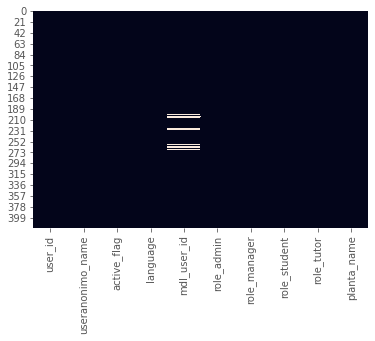

In [148]:
#Usuarios
fn.identificar_missings(usuarios)
sns.heatmap(usuarios.isnull(), cbar=False) #visualizamos los missings

In [149]:
#Observamos que la columna last_acces está completamente vacia. Procedemos a imputarla desde acceso_1ero_ultimo (ultimo acceso)
#Imputamos tambien 1er acceso
#Esto lo haremos tras tratar "acceso_1ero_ultimo"


#Asimismo, la columna de mdl_user_id, tiene 15 instancias con NaN. 
#Las eliminamos ya que esos usuarios no aparecen en ninguna tabla mas, no participan en los programas
usuarios.dropna(subset=["mdl_user_id"], inplace = True)

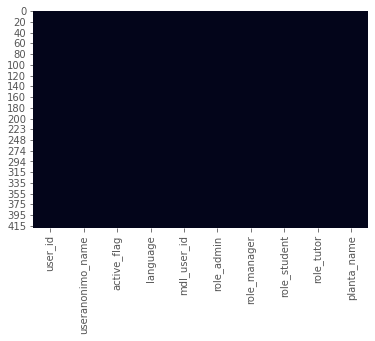

In [150]:
sns.heatmap(usuarios.isnull(), cbar=False) #visualizamos los missings

perfil_id
False    188
Name: perfil_id, dtype: int64

user_id
False    188
Name: user_id, dtype: int64

perfil_name
False    118
True      70
Name: perfil_name, dtype: int64



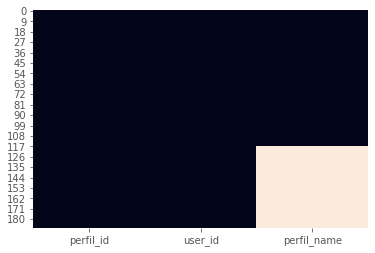

In [151]:
#Tutores_perfil
fn.identificar_missings(tutores_perfil)
sns.heatmap(tutores_perfil.isnull(), cbar=False) #visualizamos los missings

In [152]:
tutores_perfil = tutores_perfil.dropna() #quitamos las filas con NaN en perfil_name. el perfil_id de esas filas es 0, por lo que definitivamente no aportan valor

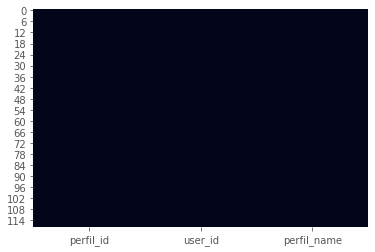

In [153]:
sns.heatmap(tutores_perfil.isnull(), cbar=False) #visualizamos los missings

conocimiento_id
False    155
Name: conocimiento_id, dtype: int64

conocimiento_name
False    155
Name: conocimiento_name, dtype: int64

created_by
False    155
Name: created_by, dtype: int64

categoria_conocimiento_id
False    155
Name: categoria_conocimiento_id, dtype: int64

categoria_conocimiento_name
False    133
True      22
Name: categoria_conocimiento_name, dtype: int64



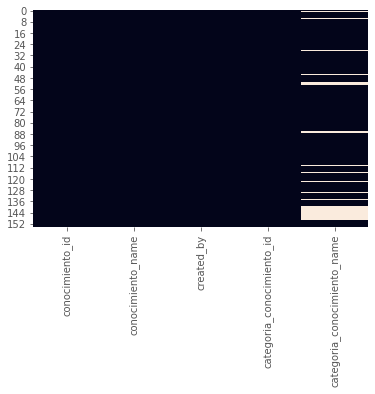

In [154]:
#Conocimientos
fn.identificar_missings(conocimientos)
sns.heatmap(conocimientos.isnull(), cbar=False) #visualizamos los missings

In [155]:
#La variable categoria_conocimiento_name tiene 22 missings. Esto se debe a que la categoria_conocimiento_id es 0. 
#Es decir, no existe ni tiene datos. Por lo tanto, vamos a quitar las filas que son missings o lo q es lo mismo, Filas
# que tienen el valor de 0 en la variable categoria_conocimiento_id.

indexNames = conocimientos[ conocimientos['categoria_conocimiento_id'] == 0 ].index
conocimientos.drop(indexNames , inplace=True)

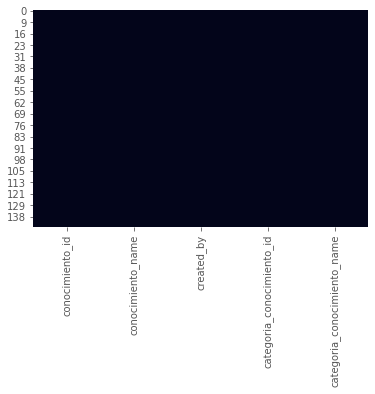

In [156]:
sns.heatmap(conocimientos.isnull(), cbar=False) #visualizamos los missings

course_id
False    139
Name: course_id, dtype: int64

course_name
False    139
Name: course_name, dtype: int64

course_category_id
False    139
Name: course_category_id, dtype: int64

hours
False    139
Name: hours, dtype: int64

course_shortname
False    139
Name: course_shortname, dtype: int64



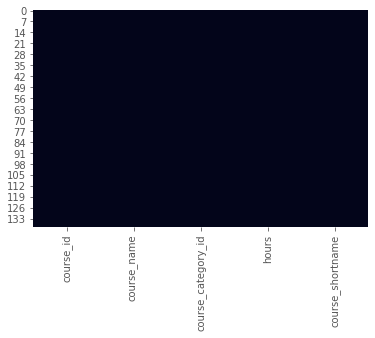

In [157]:
#Cursos
fn.identificar_missings(cursos) #no contiene valores vacios
sns.heatmap(cursos.isnull(), cbar=False) #visualizamos los missings

program_id
False    110
Name: program_id, dtype: int64

program_name
False    110
Name: program_name, dtype: int64

program_category_id
False    109
True       1
Name: program_category_id, dtype: int64



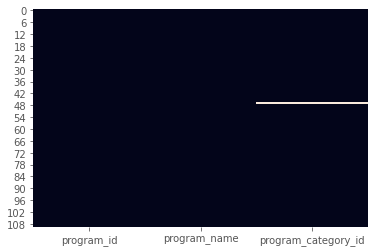

In [158]:
#Programas
fn.identificar_missings(programas)

sns.heatmap(programas.isnull(), cbar=False) #visualizamos los missings

In [159]:
#identificamos la fila con NaN
programas['vacio'] = programas['program_category_id'].isnull()
programas[programas['vacio'] == True] #vemos que el program_name es pepe, por lo que no es valido

programas.drop(['vacio'], axis = 1, inplace= True)

programas.dropna(subset=["program_category_id"], inplace = True) #lo eliminamos

#puede que haya mas program_name inventados:
programas['program_name'].unique() #se observan nombres que resultan extraños e inventados.

#los quitamos
#cursos_en_programas tiene program_name y program_id correctos (la mayoria), por lo que los imputamos desde ahi
#ademas, asi eliminamos programas que no aparecen en la tabla cursos en programas, ya que que no aparezcan significa que no pertenecen a ningun curso de modle. No nos interesan
cursos_en_programas['program_id'].unique().shape #71 programas no inventados (suponemos)
programas['program_id'].unique().shape #109-71 = 38 programas inventados

programas_correctos= []
programas_correctos = pd.DataFrame(cursos_en_programas['program_id'].unique())
programas_correctos.columns = ['program_id'] 
programas_correctos

programas = programas_correctos.merge(programas, on="program_id", how = "left")

programas['program_name'].unique() #seguimos teniendo nombres inventados; los identificamos:
programas[programas['program_name'].str.contains('prueba|Sergio')] 

#son las filas 24 - 38, las quitamos
programas = programas.drop(range(24,39,1), axis = 0 ).reset_index(drop= True)

In [160]:
#Nos hemos dado cuenta de que hay program_names con un DNI al final o con la propia palabra DNI
#Eliminamos ese trozo de texto
fn.eliminar_dni(programas, 'program_name')

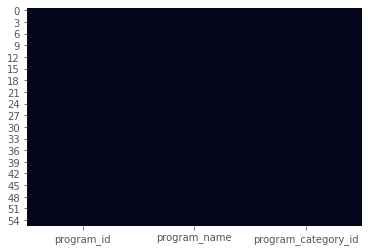

In [161]:
sns.heatmap(programas.isnull(), cbar=False) #visualizamos los missings

program_course_online_id
False    253
Name: program_course_online_id, dtype: int64

course_moodle_id
False    253
Name: course_moodle_id, dtype: int64

conocimiento_id
False    253
Name: conocimiento_id, dtype: int64

num_periodo
False    253
Name: num_periodo, dtype: int64

program_id
False    253
Name: program_id, dtype: int64

course_moodle_name
False    253
Name: course_moodle_name, dtype: int64

conocimiento_name
False    253
Name: conocimiento_name, dtype: int64

program_name
False    253
Name: program_name, dtype: int64



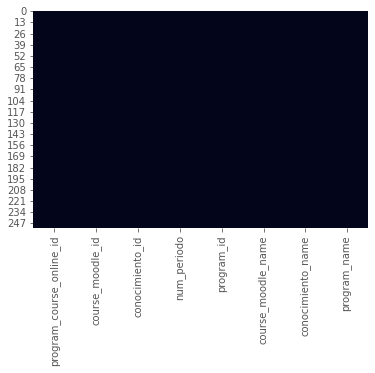

In [162]:
#Cursos en programas
fn.identificar_missings(cursos_en_programas) #no hay missings

sns.heatmap(cursos_en_programas.isnull(), cbar=False) #visualizamos los missings

In [163]:
#El program name tiene los mismos nombres inventados q en el caso anterior. Los eliminamos
cursos_en_programas[cursos_en_programas['program_name'].str.contains('prueba|Sergio')] 

cursos_en_programas = cursos_en_programas.drop(range(128,156,1), axis = 0 ).reset_index(drop = True)

In [164]:
#eliminamos el DNI que hay al final de algunos program_names
fn.eliminar_dni(cursos_en_programas, 'program_name')

In [165]:
cursos_en_programas[cursos_en_programas['program_name'].str.contains('prueba|Sergio')] #correcto

,program_course_online_id,course_moodle_id,conocimiento_id,num_periodo,program_id,course_moodle_name,conocimiento_name,program_name


active_flag
False    441
Name: active_flag, dtype: int64

itinerary_category_id
False    441
Name: itinerary_category_id, dtype: int64

date_enroll
False    440
True       1
Name: date_enroll, dtype: int64

enroll_end
True     280
False    161
Name: enroll_end, dtype: int64

program_id
False    441
Name: program_id, dtype: int64

tutor_academico_id
False    441
Name: tutor_academico_id, dtype: int64

tutor_empresa_id
False    441
Name: tutor_empresa_id, dtype: int64

user_id
False    441
Name: user_id, dtype: int64

itinerary_category_name
False    441
Name: itinerary_category_name, dtype: int64

program_name
False    441
Name: program_name, dtype: int64

duracion
True     280
False    161
Name: duracion, dtype: int64



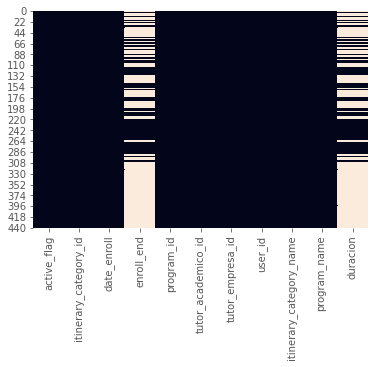

In [166]:
#Itinerarios
fn.identificar_missings(itinerarios)

sns.heatmap(itinerarios.isnull(), cbar=False) #visualizamos los missings

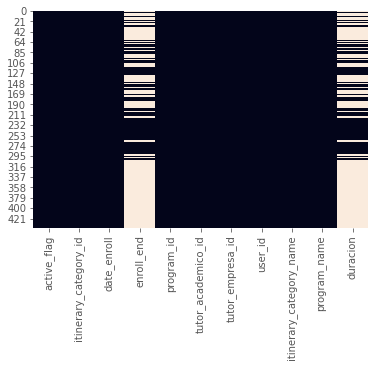

In [167]:
#identificamos la fila con NaN en date_enroll
itinerarios1 = pd.DataFrame()
itinerarios1['vacio'] = itinerarios['date_enroll'].isnull()
itinerarios1
itinerarios1[itinerarios1['vacio'] == True] 
itinerarios.iloc[52, :]

#La eliminamos ya que todo itinerario debe tener fecha de comienzo, y no se puede imputar
itinerarios.drop([52],axis=0, inplace = True)
itinerarios.reset_index(drop = True)

#con los missings de la variable enroll_end no hacemos nada, ya que la fecha final del itinerario no tiene porque estar siempre determinada

sns.heatmap(itinerarios.isnull(), cbar=False) #visualizamos los missings


enroll_grade_id
False    3898
Name: enroll_grade_id, dtype: int64

active_flag
False    3898
Name: active_flag, dtype: int64

course_id
False    3898
Name: course_id, dtype: int64

enroll_id
False    3898
Name: enroll_id, dtype: int64

grade
True     2423
False    1475
Name: grade, dtype: int64

online_progress
True     2380
False    1518
Name: online_progress, dtype: int64

course_name
False    3898
Name: course_name, dtype: int64

user_id
False    3898
Name: user_id, dtype: int64



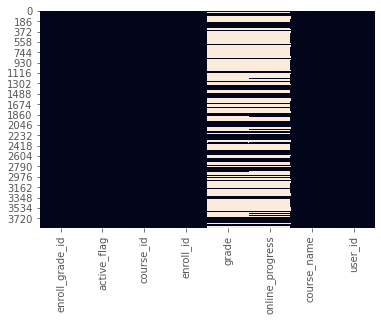

In [168]:
#Notas_cursos
fn.identificar_missings(notas_cursos)
sns.heatmap(notas_cursos.isnull(), cbar=False) #visualizamos los missings

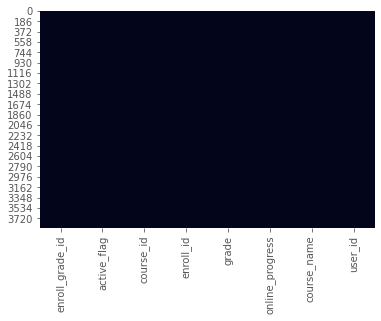

In [169]:
#Las dos variables con instancias que contienen missings son grade y online_progress. 

#En el caso de estas dos variables, es importante preguntarse porque tienen valores missings. La respuesta que se cree correcta
#es de que se tratan de variables que no tienen que tener un valor de obligatoriamente. Es decir, quizas algunos aprendices todavia 
# no han realizado el grado o el curso por lo que no tienen ninguna nota asociada. Lo mismo ocurre con el online_progress,
#puesto que mide el porcentaje de progreso del curso y quizas algunos aprendices no hayan dado comienzo al curso.

#Por estos motivos, se ha decidido que los valores ausentes que se encuentran en blanco se sustituyen por un 0 (sin iniciar.)
notas_cursos['grade'].fillna(0, inplace=True)#convertir NaN en 0
notas_cursos['online_progress'].fillna(0, inplace=True)#convertir NaN en 0

sns.heatmap(notas_cursos.isnull(), cbar=False) #visualizamos los missings

role_id
False    4
Name: role_id, dtype: int64

role_name
False    4
Name: role_name, dtype: int64



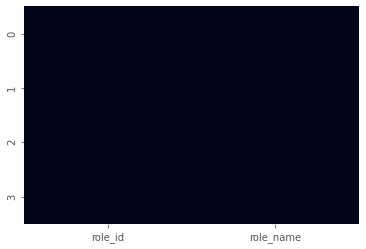

In [170]:
#Roles
fn.identificar_missings(roles) #ningun valor ausente
sns.heatmap(roles.isnull(), cbar=False) #visualizamos los missings

planta_id
False    17
Name: planta_id, dtype: int64

planta_name
False    17
Name: planta_name, dtype: int64



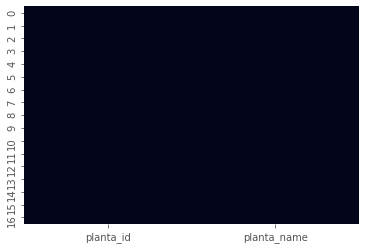

In [171]:
#Plantas
fn.identificar_missings(plantas) #ningun valor ausente
sns.heatmap(plantas.isnull(), cbar=False) #visualizamos los missings

description
False    8231
Name: description, dtype: int64

timestamp
False    8231
Name: timestamp, dtype: int64

mdl_user_id
False    8231
Name: mdl_user_id, dtype: int64

user_id
False    8231
Name: user_id, dtype: int64



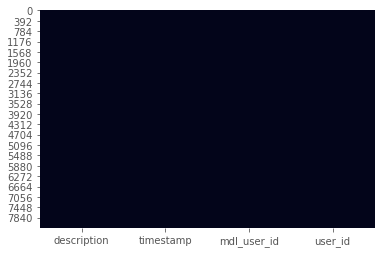

In [172]:
#Accesos
fn.identificar_missings(accesos) #ningun valor ausente
sns.heatmap(accesos.isnull(), cbar=False) #visualizamos los missings

mdl_user_id
False    372
Name: mdl_user_id, dtype: int64

1er acceso
False    295
True      77
Name: 1er acceso, dtype: int64

ultimo acceso
False    295
True      77
Name: ultimo acceso, dtype: int64



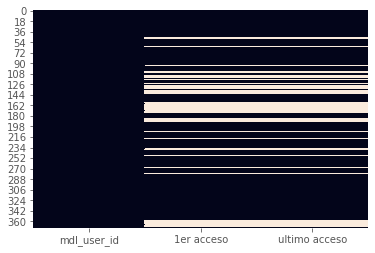

In [173]:
#Acceso_1ero_ultimo
fn.identificar_missings(acceso_1ero_ultimo)
sns.heatmap(acceso_1ero_ultimo.isnull(), cbar=False) #visualizamos los missings

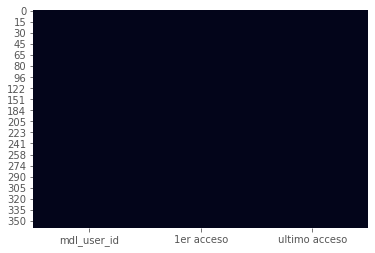

In [174]:
#Los NaN de 1er acceso y ultimo acceso son de las mismas filas, por lo que podemos quitarlas
acceso_1ero_ultimo.dropna(subset=["1er acceso"], inplace = True)

#Imputamos las dos variables de "acceso_1ero_ultimo" en "usuarios"
usuarios = usuarios.merge(acceso_1ero_ultimo, on="mdl_user_id", how = "left")
usuarios

sns.heatmap(acceso_1ero_ultimo.isnull(), cbar=False) #visualizamos los missings
#Eliminamos este dataframe
del acceso_1ero_ultimo

mdl_user_id
False    3375
Name: mdl_user_id, dtype: int64

course_name
False    3375
Name: course_name, dtype: int64

course_id
False    3375
Name: course_id, dtype: int64

course_category_id
False    3375
Name: course_category_id, dtype: int64

actividad_name
False    3371
True        4
Name: actividad_name, dtype: int64

grade
False    2097
True     1278
Name: grade, dtype: int64

time
False    2112
True     1263
Name: time, dtype: int64



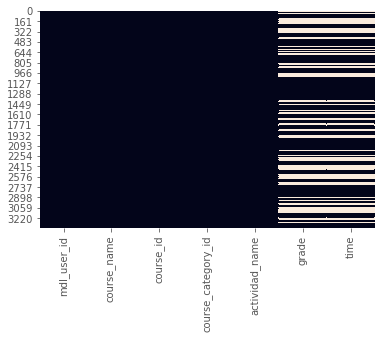

In [175]:
#Actividades
fn.identificar_missings(actividades)
sns.heatmap(actividades.isnull(), cbar=False) #visualizamos los missings

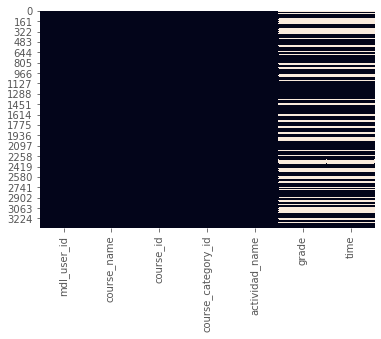

In [176]:
#Eliminamos las filas con NaN en actividad_name, ya que no contienen informacion tampoco de grade y time
actividades.dropna(subset=["actividad_name"], inplace = True) 

#Los valores de las notas no se pueden imputar debido a que se tratan de usuarios que no han comenzado
#con el curso, por lo que todavia no tienen ninguna nota.

#En cuanto a la ultima variable, la columna time consta de un numero elevado de missings (1331). En este caso, como es logico, 
#ocurre lo mismo. Aquellos usuarios que no hayan comenzado con la actividad, no tienen la fecha ni la nota correspondiente. 
#Por ello, no se cree oportuno eliminar todas las intancias y los mantendremos como NaN. (En caso de necesidad, posteriormente
#se eliminaran estos missings)

sns.heatmap(actividades.isnull(), cbar=False) #visualizamos los missings

### OUTLIERS

In [177]:
#Usuarios
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [178]:
#Tutores_perfil
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [179]:
#Conocimientos
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

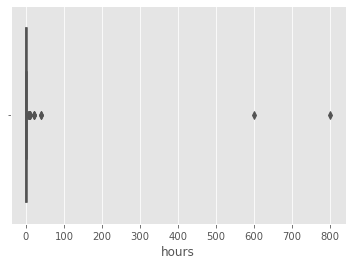

In [180]:
#Cursos
#En esta tabla, existe una variable cuantitativa (hours). Por lo que se puede analizar si existe algun outlier.
sns.boxplot(x=cursos['hours'])#se observan los valores en boxplot.

[1.43582832e-01 1.43582832e-01 1.43582832e-01 9.60637516e-02
 9.40125683e-02 9.60637516e-02 9.60637516e-02 1.43582832e-01
 9.60637516e-02 9.40125683e-02 1.43582832e-01 9.60637516e-02
 9.60637516e-02 1.19823292e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 9.36023316e+00 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.43582832e-01 9.60637516e-02 1.43582832e-01
 1.43582832e-01 9.60637516e-02 9.60637516e-02 1.43582832e-01
 2.47851316e-02 9.60637516e-02 1.19823292e-01 9.60637516e-02
 1.31703062e-01 1.31703062e-01 1.31703062e-01 6.04244416e-02
 3.31607968e-01 1.19823292e-01 7.23042116e-02 1.43582832e-01
 4.85446716e-02 4.85446716e-02 6.98427916e+00 1.43582832e-01
 1.43582832e-01 4.85446716e-02 1.43582832e-01 9.60637516e-02
 1.02559165e-03 1.43582832e-01 1.19823292e-01 1.43582832e-01
 9.40125683e-02 1.43582832e-01 1.43582832e-01 1.43582832e-01
 1.43582832e-01 1.435828

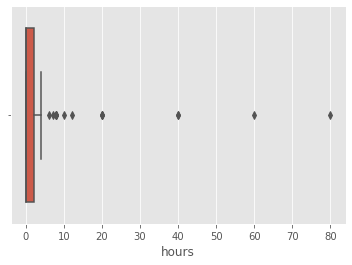

In [181]:
#Utilizaremos la función Z-score definida en la biblioteca scipy para detectar los valores atípicos.
z = np.abs(stats.zscore(cursos['hours']))
print(z)

threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) # existen dos filas que se identifican como outliers

#Las dos filas (25 y 50) identificadas como outliers, se observan y se ve que quizas se trata de un error debido a que tienen un
#cero de más.
cursos['hours'][25]#se observa el valor correspondiente
cursos['hours'][50]#se observa el valor correspondiente

cursos['hours'].replace({800: 80,600: 60}, inplace = True)#se quita un cero

z = np.abs(stats.zscore(cursos['hours']))
print(z)

sns.boxplot(x=cursos['hours'])#se observan los valores en boxplot.


In [182]:
#Programas
#En esta tabla, no se puede realizar la tecnica para identificar outlier puesto que no se cuenta con ninguna variable cuantitva.

In [183]:
#Cursos en programas
#En esta tabla, existe una variable cuantitativa (num_periodos). No tiene outliers ya que, como hemos observado en los estadisticos, los valores que toma son 0, 1, 2, o 3

In [184]:
#Itinerarios
#No hay variables cuantitativas

(array([ 363, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1836,
       2376, 3002, 3378, 3379, 3380, 3634, 3635, 3636, 3637, 3638, 3639,
       3640, 3641, 3642, 3648, 3649], dtype=int64),)


10.0

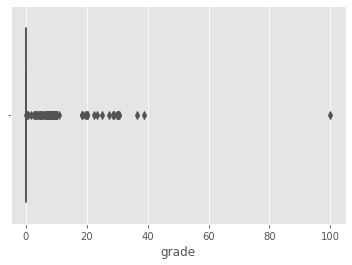

In [185]:
#Notas_cursos
notas_cursos.describe() #como hemos visto antes, los valores de grade superan el 10

sns.boxplot(x=notas_cursos['grade'])#se observan los valores en boxplot.
z = np.abs(stats.zscore(notas_cursos['grade']))

threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) # existen 27 filas con umbral mayor que 3

#notas mayores que 10, se dividen por 10 y se obtiene la nota real
notas_cursos.loc[notas_cursos['grade'] > 10, 'grade'] = notas_cursos['grade']/10 #transformacion de la nota
notas_cursos['grade'].max()#se observa que el valor maximo es 10.

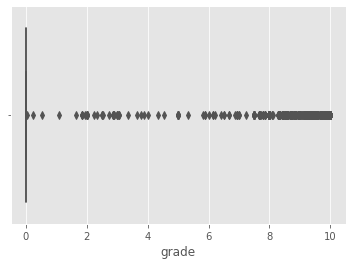

In [186]:
sns.boxplot(x=notas_cursos['grade'])#se observan los valores sin outliers en boxplot.

In [187]:
#Roles
#No hay variables cuantitativas

In [188]:
#Plantas
#No hay variables cuantitativas

In [189]:
#Accesos
#No hay variables cuantitativas

In [190]:
#Acceso_1ero_ultimo
#No hay variables cuantitativas

(array([], dtype=int64),)


<ipython-input-191-4392e306ae68>:8: RuntimeWarning: invalid value encountered in greater
  print(np.where(z > 3)) #se observa que contamos con algunos outliers


10.0

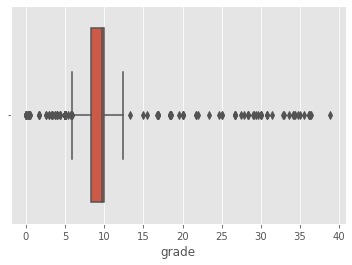

In [191]:
#Actividades
#tiene una variable cualitativa: grade
actividades.describe() #notas por encima de 10

sns.boxplot(x=actividades['grade'])#se observan los valores en boxplot.
z = np.abs(stats.zscore(actividades['grade']))
threshold = 3 #definir un umbral para identificar un valor atípico.
print(np.where(z > 3)) #se observa que contamos con algunos outliers

#notas mayores que 10, se dividen por 10 y se obtiene la nota real
actividades.loc[actividades['grade'] > 10, 'grade'] = actividades['grade']/10
actividades['grade'].max()#se observa que el valor maximo es 10.

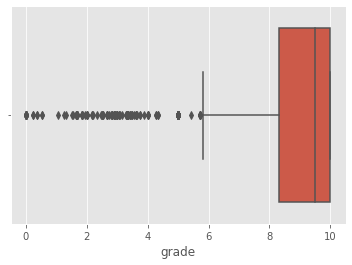

In [192]:
sns.boxplot(x=actividades['grade'])#se observan los valores sin outliers en boxplot.

In [193]:
#Una vez los datos limpios, los descargamos como csv a la carpeta datosTransformados

In [194]:
# Eliminar los .csv existentes (antiguos) en la carpeta y descargar la última version
for f in os.listdir(path_dataset1):
    if not f.endswith(".csv"):
        continue
    os.remove(os.path.join(path_dataset1, f))


fn.convertir_csv(usuarios, 'usuarios.csv')
fn.convertir_csv(tutores_perfil, 'tutores_perfil.csv')
fn.convertir_csv(conocimientos, 'conocimientos.csv')
fn.convertir_csv(cursos, 'cursos.csv')
fn.convertir_csv(programas, 'programas.csv')
fn.convertir_csv(cursos_en_programas, 'cursos_en_programas.csv')
fn.convertir_csv(itinerarios, 'itinerarios.csv')
fn.convertir_csv(notas_cursos, 'notas_cursos.csv')
fn.convertir_csv(roles, 'roles.csv')
fn.convertir_csv(plantas, 'plantas.csv')
fn.convertir_csv(accesos, 'accesos.csv')
fn.convertir_csv(actividades, 'actividades.csv')

In [195]:
!jupyter nbconvert --to script Procesamiento.ipynb

[NbConvertApp] Converting notebook Procesamiento.ipynb to script
[NbConvertApp] Writing 27424 bytes to Procesamiento.py
